# PIMA INDIAN HERITAGE

A population of women who were at least 21 years old, of Pima Indian heritage and living near Phoenix, Arizona, was tested for diabetes according to World Health Organization criteria. The data was collected by the US National Institute of Diabetes and Digestive and Kidney Diseases. You have been provided with a cleaned up version of that data, containing 392 observations in the following file.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
md = pd.read_csv("pima_indian_diabetes.csv")
md.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [4]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Times_Pregnant  392 non-null    int64  
 1   Plasma_Glucose     392 non-null    int64  
 2   Diastolic_BP       392 non-null    int64  
 3   Triceps            392 non-null    int64  
 4   Insulin            392 non-null    int64  
 5   BMI                392 non-null    float64
 6   Age                392 non-null    int64  
 7   Diabetes           392 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


In [6]:
md['No_Times_Pregnant'].unique()

array([ 1,  0,  3,  2,  5, 11, 10, 13,  4,  9,  8,  7, 15,  6, 17, 12, 14],
      dtype=int64)

## Train - Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
# np.random.seed(0)
md_train, md_test = train_test_split(md, train_size = 0.7, test_size = 0.3, 
                                     random_state = 100)
print(md_train.shape)
print(md_test.shape)

(274, 8)
(118, 8)


In [9]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

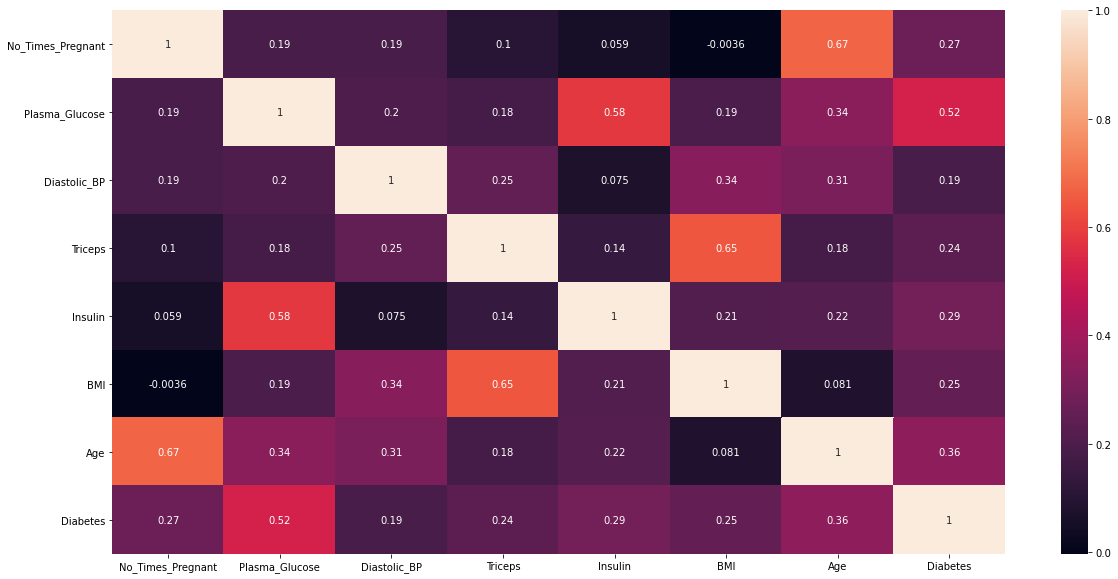

In [10]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(md_train.corr(),annot = True)
plt.show()

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

md_train[['No_Times_Pregnant','Plasma_Glucose','Diastolic_BP', 'Triceps', 'Insulin', 'BMI', 'Age']] = scaler.fit_transform(md_train[['No_Times_Pregnant','Plasma_Glucose','Diastolic_BP', 'Triceps', 'Insulin', 'BMI', 'Age']])

md_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
169,1.815945,0.957700,0.567715,0.470846,0.087700,0.124473,0.279158,1
265,0.873580,0.211296,1.537905,-2.077303,1.358030,-1.912926,3.018166,0
386,-0.697030,-0.048323,0.567715,0.942726,-0.707281,0.794302,-0.228066,0
241,0.873580,1.022605,0.567715,1.131478,-0.166366,1.785092,-0.329510,0
249,-0.697030,0.535819,-0.725872,1.131478,2.620165,1.031534,-0.938179,0


In [13]:
md_train.describe()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
count,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,274.000000
mean,2.998413e-17,-6.797077e-17,-3.515537e-16,-1.348273e-16,2.188031e-17,6.229810e-16,-6.756558e-17,0.335766
std,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,1.001830e+00,0.473122
min,-1.011151e+00,-2.157727e+00,-3.313046e+00,-2.077303e+00,-1.190826e+00,-2.108294e+00,-9.381786e-01,0.000000
25%,-6.970296e-01,-7.622751e-01,-7.258723e-01,-8.268226e-01,-6.744984e-01,-6.569955e-01,-7.352891e-01,0.000000
50%,-3.829077e-01,-1.132279e-01,1.770420e-03,-1.033313e-03,-2.770080e-01,-1.120457e-03,-4.309550e-01,0.000000
75%,5.594579e-01,6.656287e-01,7.294132e-01,7.539740e-01,2.721025e-01,5.605598e-01,4.820476e-01,1.000000
max,4.328920e+00,2.385604e+00,3.154889e+00,2.924620e+00,5.619783e+00,4.715598e+00,3.322500e+00,1.000000


## Dividing into X and Y sets for the model building

In [14]:
y_train = md_train.pop('Diabetes')
X_train = md_train

In [15]:
y_train.head()

169    1
265    0
386    0
241    0
249    0
Name: Diabetes, dtype: int64

In [16]:
X_train.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
169,1.815945,0.957700,0.567715,0.470846,0.087700,0.124473,0.279158
265,0.873580,0.211296,1.537905,-2.077303,1.358030,-1.912926,3.018166
386,-0.697030,-0.048323,0.567715,0.942726,-0.707281,0.794302,-0.228066
241,0.873580,1.022605,0.567715,1.131478,-0.166366,1.785092,-0.329510
249,-0.697030,0.535819,-0.725872,1.131478,2.620165,1.031534,-0.938179


## Building a Logistic Model

In [17]:
import statsmodels.api as sm

In [18]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.11
Date:                Sat, 16 Apr 2022   Deviance:                       244.22
Time:                        13:25:19   Pearson chi2:                     264.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9713      0.170     -5.719      0.000      -1.304      -0.638
No_Times_Pregnant     0.2917      0.210      1.386      0.166      -0.121       0.704
Plasma_Glucose        1.2614      0.216      5.851      0.000       0.839       1.684
Diastolic_BP         -0.0746      0.174     -0.429      0.668      -0.415       0.266
Triceps               0.1371      0.205      0.668      0.504      -0.265       0.539
Insulin              -0.1305      0.179     -0.728      0.467      -0.482       0.221
BMI                   0.4634      0.215      2.151      0.031       0.041       0.886
Age                   0.3631      0.224      1.624      0.104      -0.075       0.801
=====================================================================================
"""

## Feature Selection Using RFE

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [20]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('No_Times_Pregnant', True, 1),
 ('Plasma_Glucose', True, 1),
 ('Diastolic_BP', False, 3),
 ('Triceps', True, 1),
 ('Insulin', False, 2),
 ('BMI', True, 1),
 ('Age', True, 1)]